/home/npacey/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/npacey/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


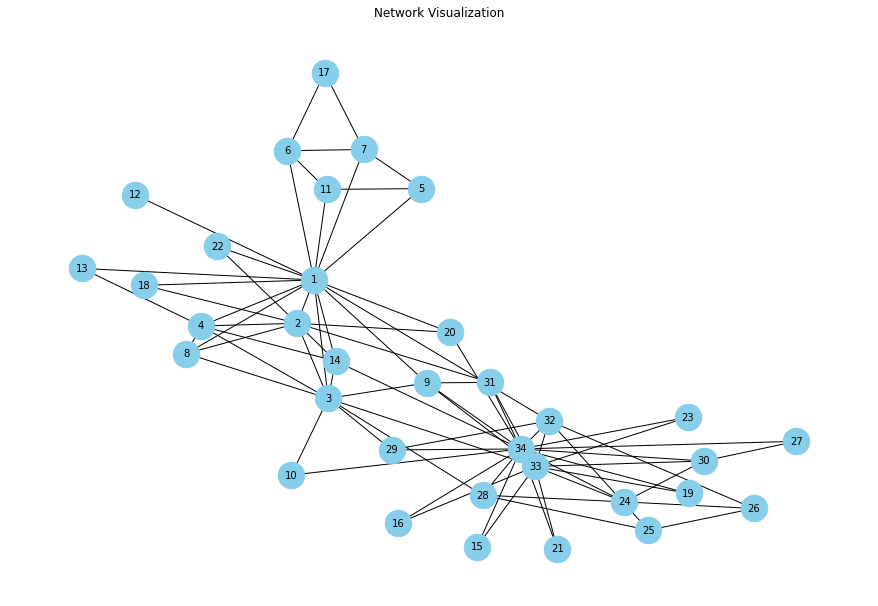

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns  # Make sure to install seaborn if you haven't already


# Network edges as described in the text file
edges = [
    (2, 1), (3, 1), (3, 2), (4, 1), (4, 2), (4, 3), (5, 1), (6, 1), (7, 1), (7, 5), (7, 6),
    (8, 1), (8, 2), (8, 3), (8, 4), (9, 1), (9, 3), (10, 3), (11, 1), (11, 5), (11, 6), (12, 1),
    (13, 1), (13, 4), (14, 1), (14, 2), (14, 3), (14, 4), (17, 6), (17, 7), (18, 1), (18, 2),
    (20, 1), (20, 2), (22, 1), (22, 2), (26, 24), (26, 25), (28, 3), (28, 24), (28, 25), (29, 3),
    (30, 24), (30, 27), (31, 2), (31, 9), (32, 1), (32, 25), (32, 26), (32, 29), (33, 3), (33, 9),
    (33, 15), (33, 16), (33, 19), (33, 21), (33, 23), (33, 24), (33, 30), (33, 31), (33, 32), (34, 9),
    (34, 10), (34, 14), (34, 15), (34, 16), (34, 19), (34, 20), (34, 21), (34, 23), (34, 24), (34, 27),
    (34, 28), (34, 29), (34, 30), (34, 31), (34, 32), (34, 33)
]

edges_tuple = edges 

# Create a graph from the edges
G = nx.Graph()
G.add_edges_from(edges)

# Draw the network
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', linewidths=1, font_size=10)
plt.title('Network Visualization')
plt.show()


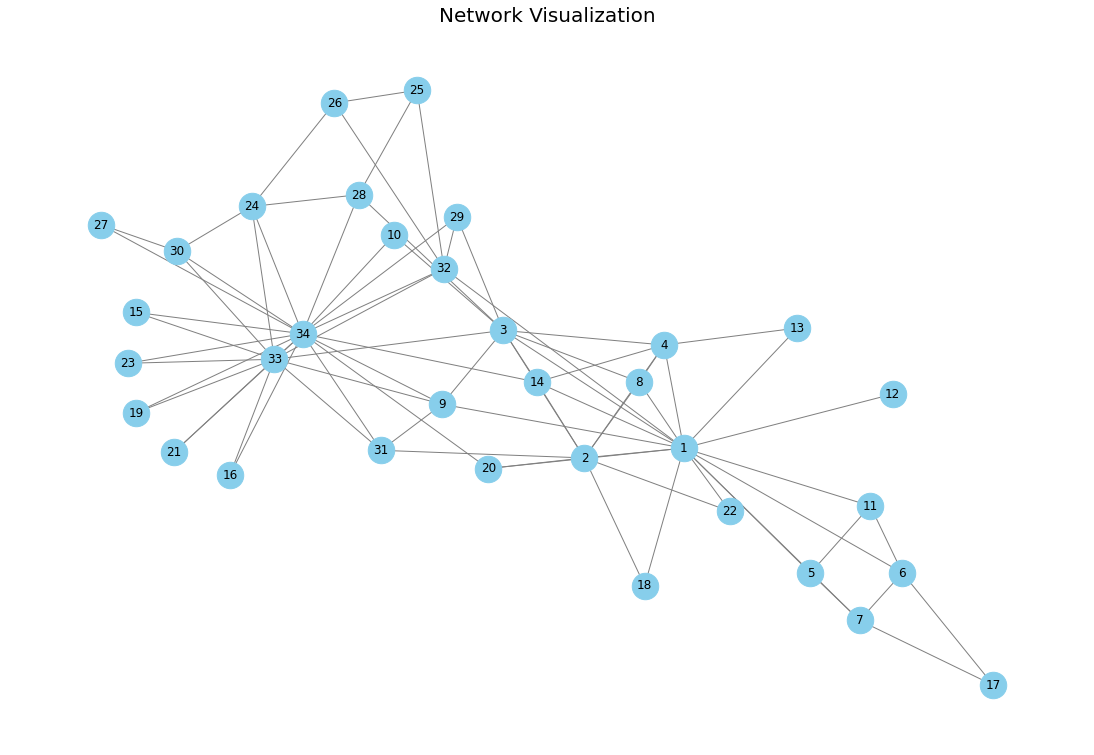

In [2]:


# Create a graph from the edges
G = nx.Graph()
G.add_edges_from(edges)

# Use a spring layout for better spacing of nodes
pos = nx.spring_layout(G, k=0.2, iterations=200)  # You can adjust k for the optimal distance between nodes

# Draw the network with the new positions
plt.figure(figsize=(15, 10))  # Adjust the figure size to your needs
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray', linewidths=1, font_size=12)
plt.title('Network Visualization',fontsize='20')
plt.axis('off')  # Hide the axis
plt.show()



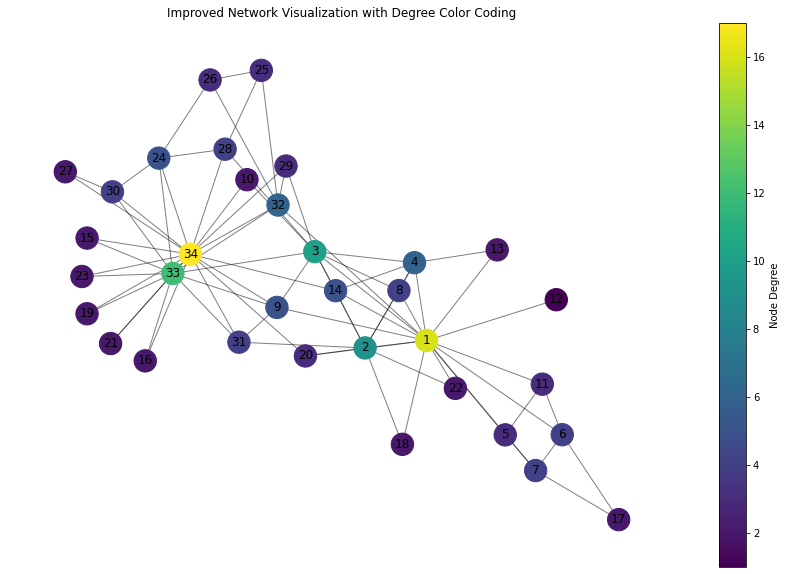

In [3]:
# Assuming 'edges' variable is already defined as shown in previous code.

# Get the degree of each node (number of connections)
degrees = dict(G.degree())
# Assign a color to each node based on its degree
node_color = [degrees[node] for node in G.nodes()]

# Draw the network with the new positions and color-coded nodes
plt.figure(figsize=(15, 10))
# The 'vmin' and 'vmax' arguments specify the color range
scatter = nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_color, cmap=plt.cm.viridis, vmin=min(node_color), vmax=max(node_color))
edges = nx.draw_networkx_edges(G, pos, alpha=0.5)
labels = nx.draw_networkx_labels(G, pos, font_size=12)

# Draw the color bar
plt.colorbar(scatter, label='Node Degree')

plt.title('Improved Network Visualization with Degree Color Coding')
plt.axis('off')  # Hide the axis
plt.show()


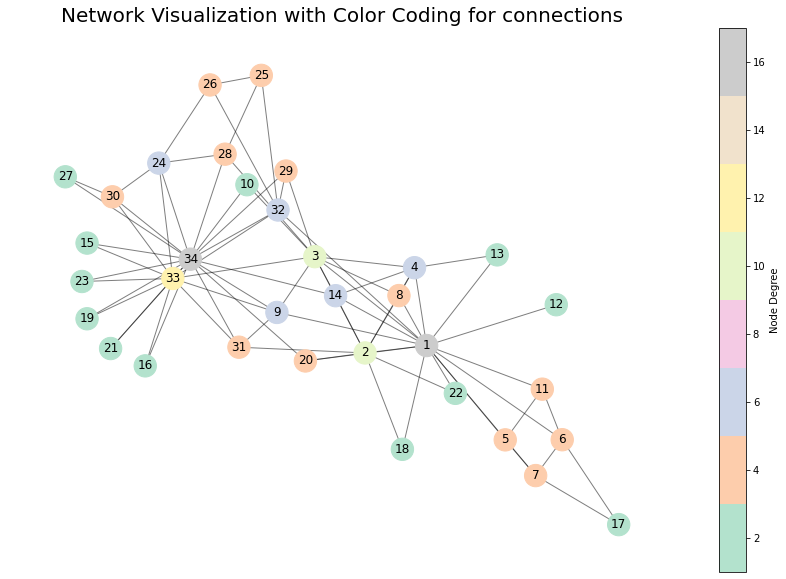

In [4]:
light_cmap = plt.cm.Pastel2

# Draw the network with the new positions and color-coded nodes
plt.figure(figsize=(15, 10))
scatter = nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_color, cmap=light_cmap, vmin=min(node_color), vmax=max(node_color))
edges = nx.draw_networkx_edges(G, pos, alpha=0.5)
labels = nx.draw_networkx_labels(G, pos, font_size=12)

# Draw the color bar
plt.colorbar(scatter, label='Node Degree')

plt.title('Network Visualization with Color Coding for connections',fontsize='20')
plt.axis('off')  # Hide the axis
plt.show()

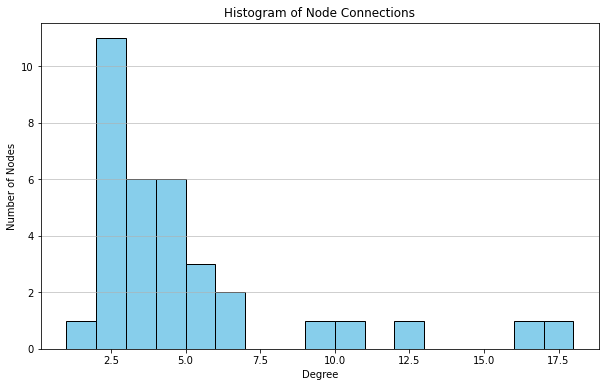

In [5]:


# Calculate the degree of each node
degree_sequence = [G.degree(n) for n in G.nodes()]

# Plotting the histogram of degrees
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 2), color='skyblue', edgecolor='black')
plt.title('Histogram of Node Connections')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
#plt.xticks(range(min(degree_sequence), max(degree_sequence) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()


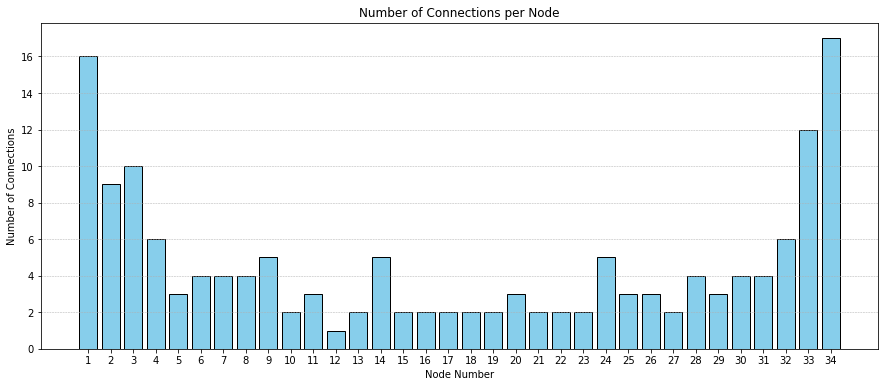

In [6]:
# Sort nodes by their number
sorted_nodes = sorted(degrees.keys())
sorted_degrees = [degrees[node] for node in sorted_nodes]

# Create a bar chart
plt.figure(figsize=(15, 6))
plt.bar(sorted_nodes, sorted_degrees, color='skyblue', edgecolor='black')
plt.title('Number of Connections per Node')
plt.xlabel('Node Number')
plt.ylabel('Number of Connections')
plt.xticks(sorted_nodes)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [7]:
# Network edges as described in the text file
edges = edges_tuple

# Determine the number of nodes, assuming the highest node number is N
N = max(max(pair) for pair in edges)  # Find the largest node number in edges

# Initialize the adjacency matrix A
A = np.zeros((N, N))

# Populate the adjacency matrix based on the edges
for i, j in edges:
    A[i-1][j-1] = 1
    A[j-1][i-1] = 1  # Assuming the graph is undirected

# Initialize the probability vector for each node
p = np.zeros((N, 1))
start = np.random.randint(N)  # Random starting node
p[start] = 1  # Set the starting node probability to 1

# Define the degree matrix D
D = np.diag(A.sum(axis=1))

# Define the steady-state threshold
threshold = 0.1  # threshold for steady state

# Function to calculate the probability of node i at time t
def calculate_probability(i, t, p, A, D):
    return sum(A[i, :] * (1/D.diagonal()) * p[:, t-1])

# Simulate the random walk until steady state is reached
t = 1
change = np.inf  # Initialize change to a large number
while change > threshold:
    p = np.hstack((p, np.zeros((N, 1))))  # Add a new column for time t
    changes = []  # List to keep track of changes for convergence
    for i in range(N):
        p[i, t] = calculate_probability(i, t, p, A, D)
        if p[i, t-1] != 0:  # Prevent division by zero
            change = abs((p[i, t] - p[i, t-1]) / p[i, t-1])
            changes.append(change)
    
    if changes:  # Check if there are any changes
        change = max(changes)  # Use the maximum change to determine convergence
    
    t += 1  # Increment time step

# Steady state has been reached
print("Starting Node: ", start)
steady_state_distribution = p[:, t-1]
print("Steady-state probability distribution within 1%:")
print(steady_state_distribution)

Starting Node:  1
Steady-state probability distribution within 1%:
[0.11312058 0.06291531 0.06531355 0.04202414 0.02172154 0.02902914
 0.02902914 0.02760543 0.0311334  0.01223252 0.02172154 0.0069889
 0.01411882 0.03326709 0.01123435 0.01123435 0.01475442 0.01390465
 0.01123435 0.01956631 0.01123435 0.01390465 0.01123435 0.02801109
 0.01721554 0.01712555 0.01122118 0.02335976 0.01823084 0.02243197
 0.02452119 0.03521113 0.07158524 0.10256361]


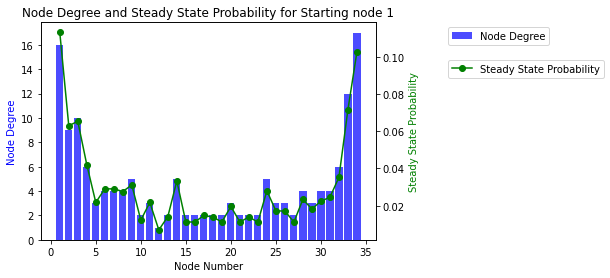

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Assuming 'G' is your networkx graph object and 'steady_state_distribution' is a numpy array of your steady-state probabilities

# Calculate the degree of each node
degrees = [val for (node, val) in G.degree()]

# Sort nodes by their number and sort degrees in the same order
sorted_nodes = sorted(G.nodes())
sorted_degrees = [G.degree(node) for node in sorted_nodes]

# Get the sorted steady state probabilities in the same order
sorted_probabilities = [steady_state_distribution[i-1] for i in sorted_nodes]

# Create a figure with two y-axes
fig, ax1 = plt.subplots()

# Plot the degrees histogram
ax1.bar(sorted_nodes, sorted_degrees, alpha=0.7, color='blue', label='Node Degree')

# Create another y-axis for the steady state probabilities
ax2 = ax1.twinx()
ax2.plot(sorted_nodes, sorted_probabilities, color='green', marker='o', linestyle='-', label='Steady State Probability')

# Set labels and titles
ax1.set_xlabel('Node Number')
ax1.set_ylabel('Node Degree', color='blue')
ax2.set_ylabel('Steady State Probability', color='green')
title_str = 'Node Degree and Steady State Probability for Starting node ' +str(start)
plt.title(title_str)

# Add legend
ax1.legend(loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1.2, 0.85))
plt.show()


In [9]:
# Assuming 'edges_tuple' is a list of tuples representing the network edges.
edges = edges_tuple  # Replace with your actual edges

# Calculate the steady state probabilities for multiple starting nodes and store in a dictionary
N = max(max(edge) for edge in edges)  # Determine the number of nodes

# Initialize the adjacency matrix A based on the edges
A = np.zeros((N, N))
for edge in edges:
    i, j = edge
    A[i-1, j-1] = 1
    A[j-1, i-1] = 1  # Assuming the graph is undirected

# Define the degree matrix D
D = np.diag(A.sum(axis=1))

# Initialize a dictionary to store steady-state probabilities for each starting node
steadystate_dict = {}

# Define the threshold for steady state

# Define a function to calculate the transition probabilities
def calculate_probability(i, t, p, A, D):
    return sum(A[i, :] * (1 / D.diagonal()) * p[:, t - 1])

# Run the simulation for a number of iterations
iterations = N

for start_node in range(1,iterations+1):
    # Reset the probability vector for each starting node
    p = np.zeros((N, 1))
    p[start_node-1] = 1  # Set the starting node probability to 1

    t = 1  # Time step counter
    change = np.inf  # Change starts out as infinity

    # Run the Markov process until steady state is reached
    while change > threshold:
        p = np.hstack((p, np.zeros((N, 1))))  # Add a new column for time t
        changes = []  # List to track changes for convergence
        for i in range(N):
            p[i, t] = calculate_probability(i, t, p, A, D)
            if p[i, t - 1] != 0:  # Prevent division by zero
                change = abs((p[i, t] - p[i, t - 1]) / p[i, t - 1])
                changes.append(change)
        if changes:  # If there are changes, determine the max change
            change = max(changes)
        t += 1  # Increment time step

    # Store the steady-state probabilities in the dictionary
    steadystate_dict[start_node] = p[:, t - 1]

# Output the dictionary containing steady-state probabilities for each starting node
for start_node, distribution in steadystate_dict.items():
    print(f"Starting Node: {start_node}")
    print("Steady-state distribution within ", threshold*100)
    print(distribution)
    print()

Starting Node: 1
Steady-state distribution within  10.0
[0.12009579 0.06363033 0.06420302 0.04282842 0.02523331 0.03448771
 0.03448771 0.02813312 0.03021785 0.01164118 0.02523331 0.0074889
 0.01472566 0.03335574 0.01032256 0.01032256 0.01801354 0.0144778
 0.01032256 0.01970043 0.01032256 0.0144778  0.01032256 0.02565924
 0.01603587 0.01584697 0.01020685 0.02180474 0.01732458 0.02039839
 0.02345127 0.03359283 0.06615405 0.09548076]

Starting Node: 2
Steady-state distribution within  10.0
[0.11312058 0.06291531 0.06531355 0.04202414 0.02172154 0.02902914
 0.02902914 0.02760543 0.0311334  0.01223252 0.02172154 0.0069889
 0.01411882 0.03326709 0.01123435 0.01123435 0.01475442 0.01390465
 0.01123435 0.01956631 0.01123435 0.01390465 0.01123435 0.02801109
 0.01721554 0.01712555 0.01122118 0.02335976 0.01823084 0.02243197
 0.02452119 0.03521113 0.07158524 0.10256361]

Starting Node: 3
Steady-state distribution within  10.0
[0.10319903 0.05988754 0.06650571 0.04001538 0.01817259 0.02371902
 0.0

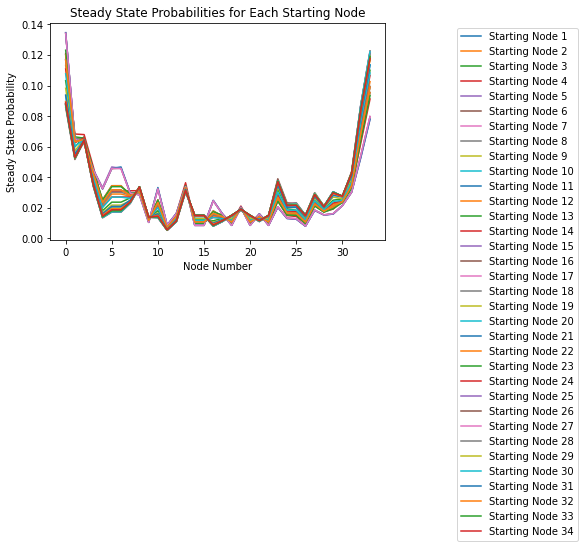

In [10]:
# Perform simulations for different starting nodes and store steady-state distributions
steadystate_dict = {}
for start_node in range(N):
    # Reset the probability vector for each starting node
    p = np.zeros((N, 1))
    p[start_node] = 1  # Starting node has the 'box'

    t = 1  # Initialize time step
    change = np.inf  # Change starts out as infinity
    while change > threshold:
        p = np.hstack((p, np.zeros((N, 1))))  # Add a new column for time t
        changes = []  # List to track changes for convergence
        for i in range(N):
            p[i, t] = calculate_probability(i, t, p, A, D)
            if p[i, t - 1] != 0:  # Avoid division by zero
                change = abs((p[i, t] - p[i, t - 1]) / p[i, t - 1])
                changes.append(change)
        change = max(changes) if changes else 0  # Get the max change
        t += 1  # Increment time step

    # Store the steady state probabilities for each starting node
    steadystate_dict[start_node] = p[:, t - 1]

# Plotting steady state probabilities for each starting node
for start_node, probabilities in steadystate_dict.items():
    plt.plot(probabilities, label=f'Starting Node {start_node + 1}')  # Node numbering starts at 1

plt.xlabel('Node Number')
plt.ylabel('Steady State Probability')
plt.title('Steady State Probabilities for Each Starting Node')
plt.legend(bbox_to_anchor=(1.2, 1))
plt.show()

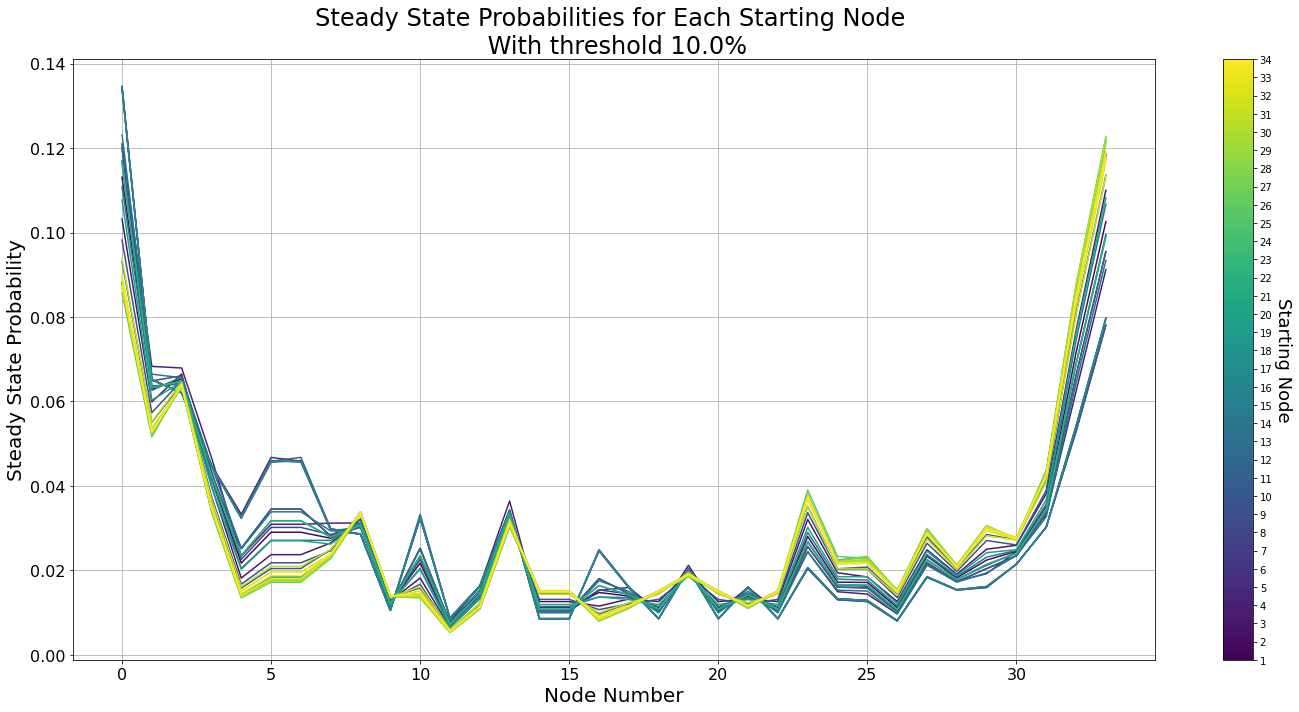

In [11]:
# Plotting steady state probabilities for each starting node using a colormap
plt.figure(figsize=(20, 10))  # Making the plot larger

# Creating a colormap
cmap = plt.cm.viridis

# Normalizing the starting node index to the [0,1] interval for colormap scaling
norm = plt.Normalize(0, N-1)

# Plotting each starting node's steady-state probabilities with a unique color from the colormap
for start_node, probabilities in steadystate_dict.items():
    plt.plot(probabilities, color=cmap(norm(start_node)), label=f'Starting Node {start_node + 1}')

plt.xlabel('Node Number', fontsize=20)
plt.ylabel('Steady State Probability', fontsize=20)
# Increase the tick label size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
title='Steady State Probabilities for Each Starting Node \n With threshold '+str(threshold*100)+'%'
plt.title(title, fontsize=24)

# Create a colorbar with the colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older Matplotlib versions to prevent warnings
cbar = plt.colorbar(sm, ticks=np.linspace(0, N-1, num=N))
cbar.ax.set_yticklabels(range(1, N+1))  # Set colorbar labels to match starting nodes
cbar.set_label('Starting Node', rotation=270, labelpad=20, fontsize=18)

plt.grid(True)
plt.tight_layout()
plt.show()

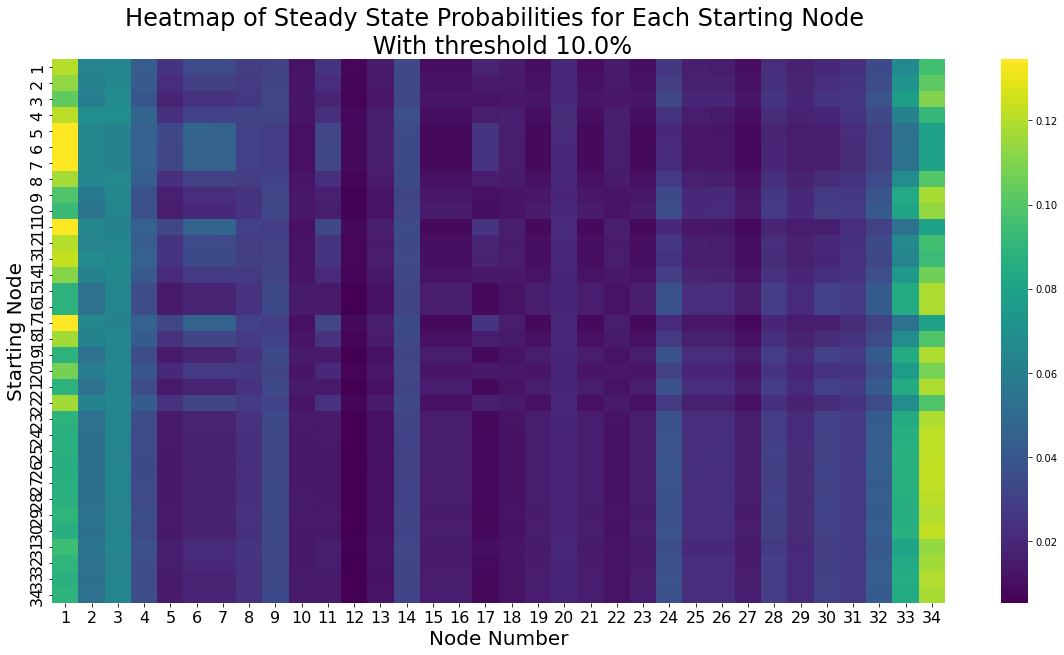

In [12]:

# Assuming `steadystate_dict` is a dictionary with nodes as keys and probability distributions as values
# Convert steadystate_dict to a 2D list or array where each row corresponds to a starting node
steady_state_matrix = [probabilities for _, probabilities in sorted(steadystate_dict.items())]

# Adjusting the indices for each node by adding one, since the nodes are 0-indexed in Python
adjusted_node_indices = [i + 1 for i in range(N)]

# Use seaborn to create the heatmap
plt.figure(figsize=(20, 10))
ax = sns.heatmap(steady_state_matrix, annot=False, cmap='viridis', cbar=True)

# Adjust the tick labels to correctly represent node numbers starting from 1 instead of 0
ax.set_xticklabels(adjusted_node_indices, fontsize=16)
ax.set_yticklabels(adjusted_node_indices, fontsize=16)
title_heat = 'Heatmap of '+ title
plt.title(title_heat, fontsize=24)
plt.xlabel('Node Number', fontsize=20)
plt.ylabel('Starting Node', fontsize=20)
plt.show()


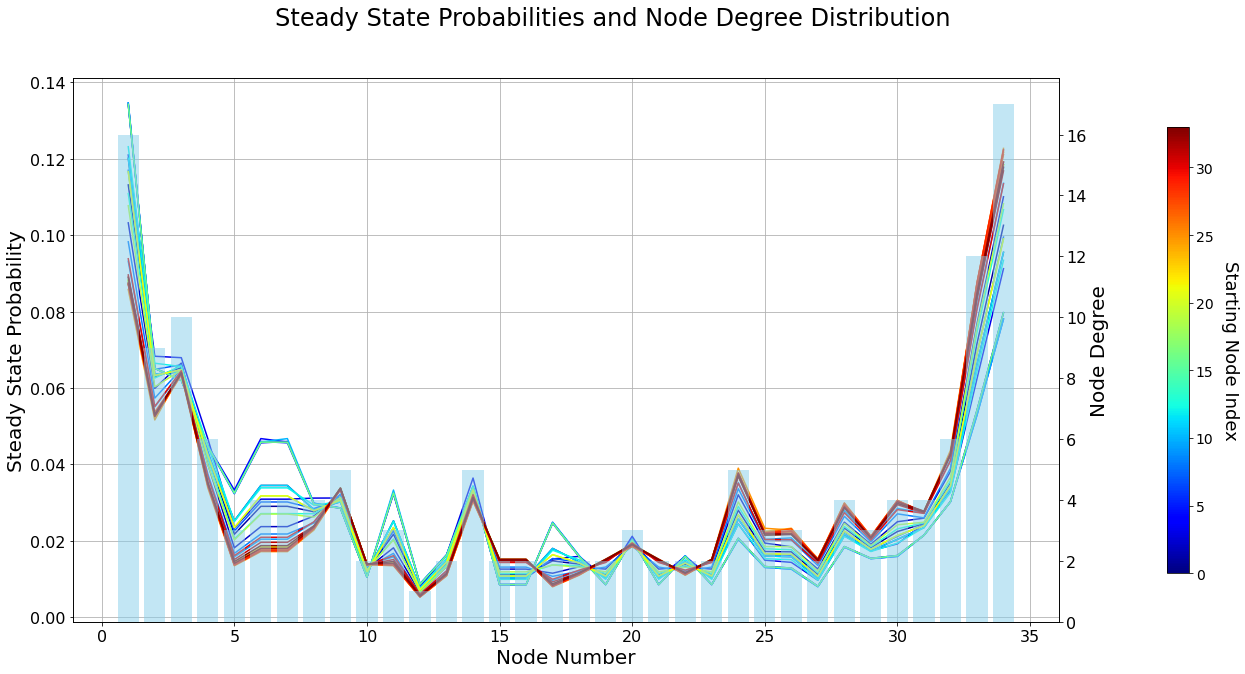

In [13]:
# Calculate the degree for each node
node_degrees = [G.degree(n) for n in sorted(G.nodes())]

# Create the colormap
cmap = plt.cm.jet
norm = plt.Normalize(0, N - 1)

# Start plotting
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plotting steady state probabilities for each starting node with a unique color from the colormap
for start_node, probabilities in steadystate_dict.items():
    ax1.plot(sorted(G.nodes()), probabilities, color=cmap(norm(start_node)), label=f'Starting Node {start_node + 1}')

# Set labels and titles for the first axis
ax1.set_xlabel('Node Number', fontsize=20)
ax1.set_ylabel('Steady State Probability', fontsize=20)
ax1.tick_params(axis='y', labelsize=16)
ax1.tick_params(axis='x', labelsize=16)

# Create another y-axis for the node degrees
ax2 = ax1.twinx()
ax2.bar(sorted(G.nodes()), node_degrees, alpha=0.5, color='skyblue', label='Node Degree')
ax2.set_ylabel('Node Degree', fontsize=20)
ax2.tick_params(axis='y', labelsize=16)

# Create a colorbar with the colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older Matplotlib versions to prevent warnings
cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Starting Node Index', rotation=270, labelpad=25, fontsize=18)
cbar.ax.tick_params(labelsize=14)

# Add grid and legend to the first axis
ax1.grid(True)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=16)

# Title for the entire figure
fig.suptitle('Steady State Probabilities and Node Degree Distribution', fontsize=24)

#plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the padding to accommodate the title
plt.show()

In [14]:
# Calculate the Laplacian matrix L
L = D - A

# Compute the eigenvalues and eigenvectors of the Laplacian matrix
eigenvalues, eigenvectors = np.linalg.eigh(L)

# Find the index of the second smallest eigenvalue (Fiedler value)
fiedler_index = np.argsort(eigenvalues)[1]  # Index of Fiedler value

# Retrieve the Fiedler vector
fiedler_vector = eigenvectors[:, fiedler_index]

# Output the Fiedler vector
print("Fiedler vector:\n", fiedler_vector)

Fiedler vector:
 [-0.11213743 -0.04128789  0.02321896 -0.05549978 -0.28460453 -0.32372722
 -0.32372722 -0.052586    0.05160128  0.09280089 -0.28460453 -0.21099295
 -0.1094613  -0.01474197  0.16275078  0.16275078 -0.42276533 -0.10018142
  0.16275078 -0.01363713  0.16275078 -0.10018142  0.16275078  0.15569457
  0.15302558  0.16096292  0.18710956  0.12766405  0.0951523   0.16765031
  0.07349964  0.09875343  0.13034546  0.11890326]


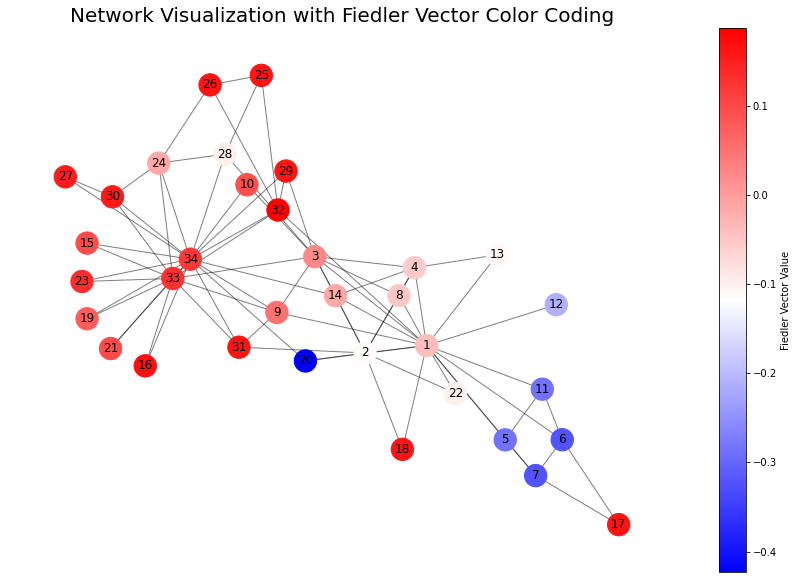

In [15]:

# Normalize Fiedler vector for color mapping
# Create a light color map
light_cmap = plt.cm.bwr

# Draw the network
plt.figure(figsize=(15, 10))
scatter = nx.draw_networkx_nodes(G, pos, node_size=500, node_color=fiedler_vector, cmap=light_cmap)
edges = nx.draw_networkx_edges(G, pos, alpha=0.5)
labels = nx.draw_networkx_labels(G, pos, font_size=12)

# Draw the color bar
plt.colorbar(scatter, label='Fiedler Vector Value')

plt.title('Network Visualization with Fiedler Vector Color Coding', fontsize=20)
plt.axis('off')  # Hide the axis
plt.show()


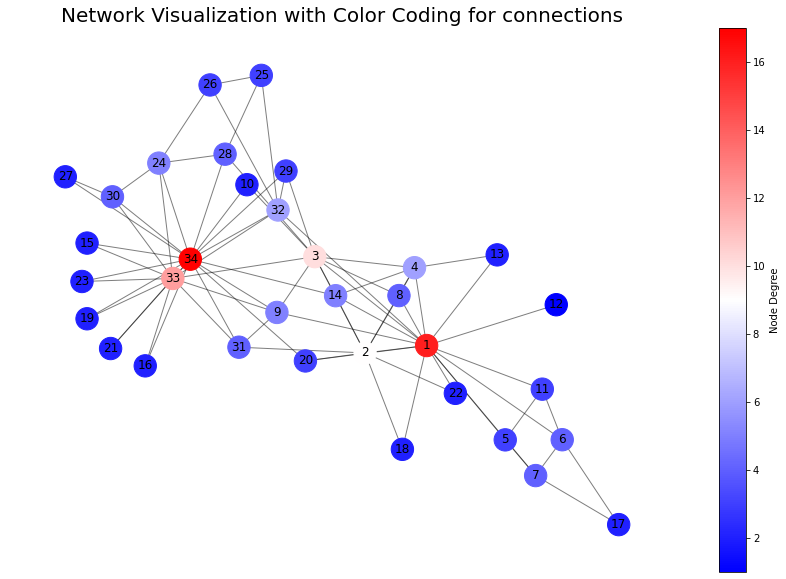

In [16]:
light_cmap = plt.cm.bwr

# Draw the network with the new positions and color-coded nodes
plt.figure(figsize=(15, 10))
scatter = nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_color, cmap=light_cmap, vmin=min(node_color), vmax=max(node_color))
edges = nx.draw_networkx_edges(G, pos, alpha=0.5)
labels = nx.draw_networkx_labels(G, pos, font_size=12)

# Draw the color bar
plt.colorbar(scatter, label='Node Degree')

plt.title('Network Visualization with Color Coding for connections',fontsize='20')
plt.axis('off')  # Hide the axis
plt.show()

Nodes with positive Fiedler vector components:
 [ 3  9 10 15 16 19 21 23 24 25 26 27 28 29 30 31 32 33 34]
Nodes with negative Fiedler vector components:
 [ 1  2  4  5  6  7  8 11 12 13 14 17 18 20 22]


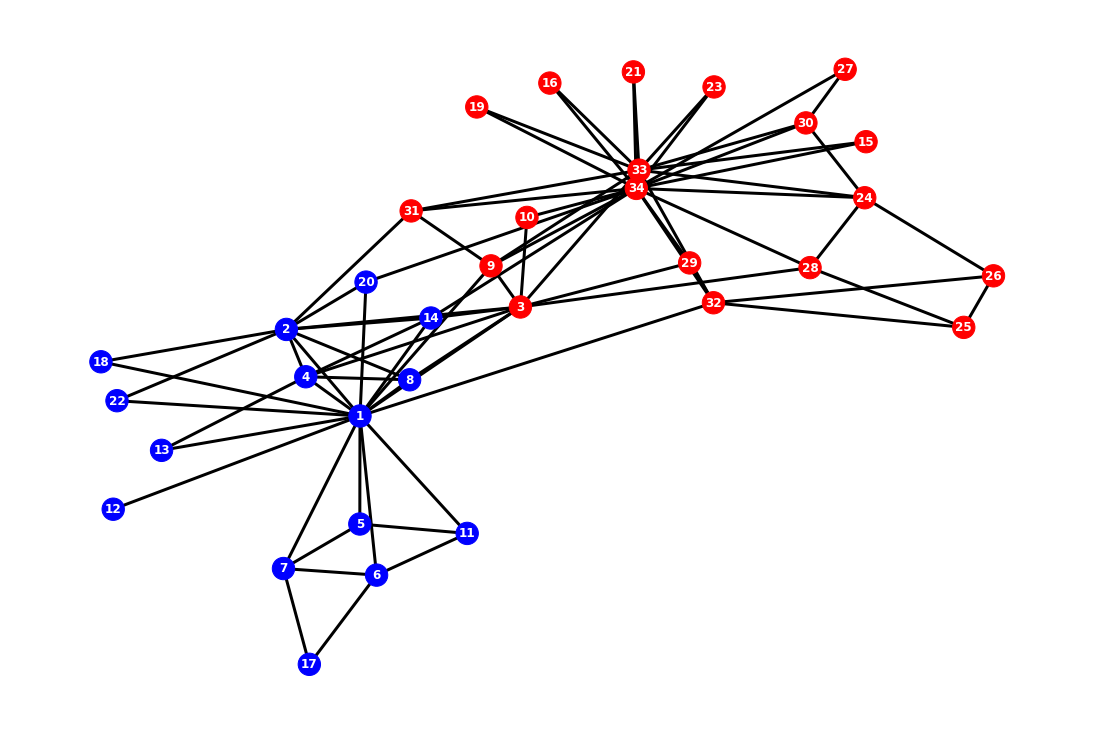

In [17]:

# Initialize two lists to hold nodes with positive and negative Fiedler vector components
positive_nodes = []
negative_nodes = []

# Iterate over the Fiedler vector and populate the lists
for i, value in enumerate(fiedler_vector):
    if value > 0:
        positive_nodes.append(i+1)  # Assuming nodes are 1-indexed
    else:
        negative_nodes.append(i+1)

positive_nodes = np.array(positive_nodes)
negative_nodes = np.array(negative_nodes)

# Now you have two arrays: one for nodes corresponding to positive Fiedler vector entries,
# and one for those with negative entries.
print("Nodes with positive Fiedler vector components:\n", positive_nodes)
print("Nodes with negative Fiedler vector components:\n", negative_nodes)

pos = [3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
neg = [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]

color_map_n, color_map_e = [], []


for node in G: 
    if node in pos: color_map_n.append('red')
    else: color_map_n.append('blue')

for edge in G.edges():
    if edge[0] in neg and edge[1] in neg: color_map_e.append('blue')
    elif edge[0] in pos and edge[1] in pos: color_map_e.append('red')
    else: color_map_e.append('purple')



fig = plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.6, iterations=100)
nx.draw(G, pos, with_labels=True, node_size=500, node_color=color_map_n, font_weight='bold', font_color='white', width=3)
plt.show()

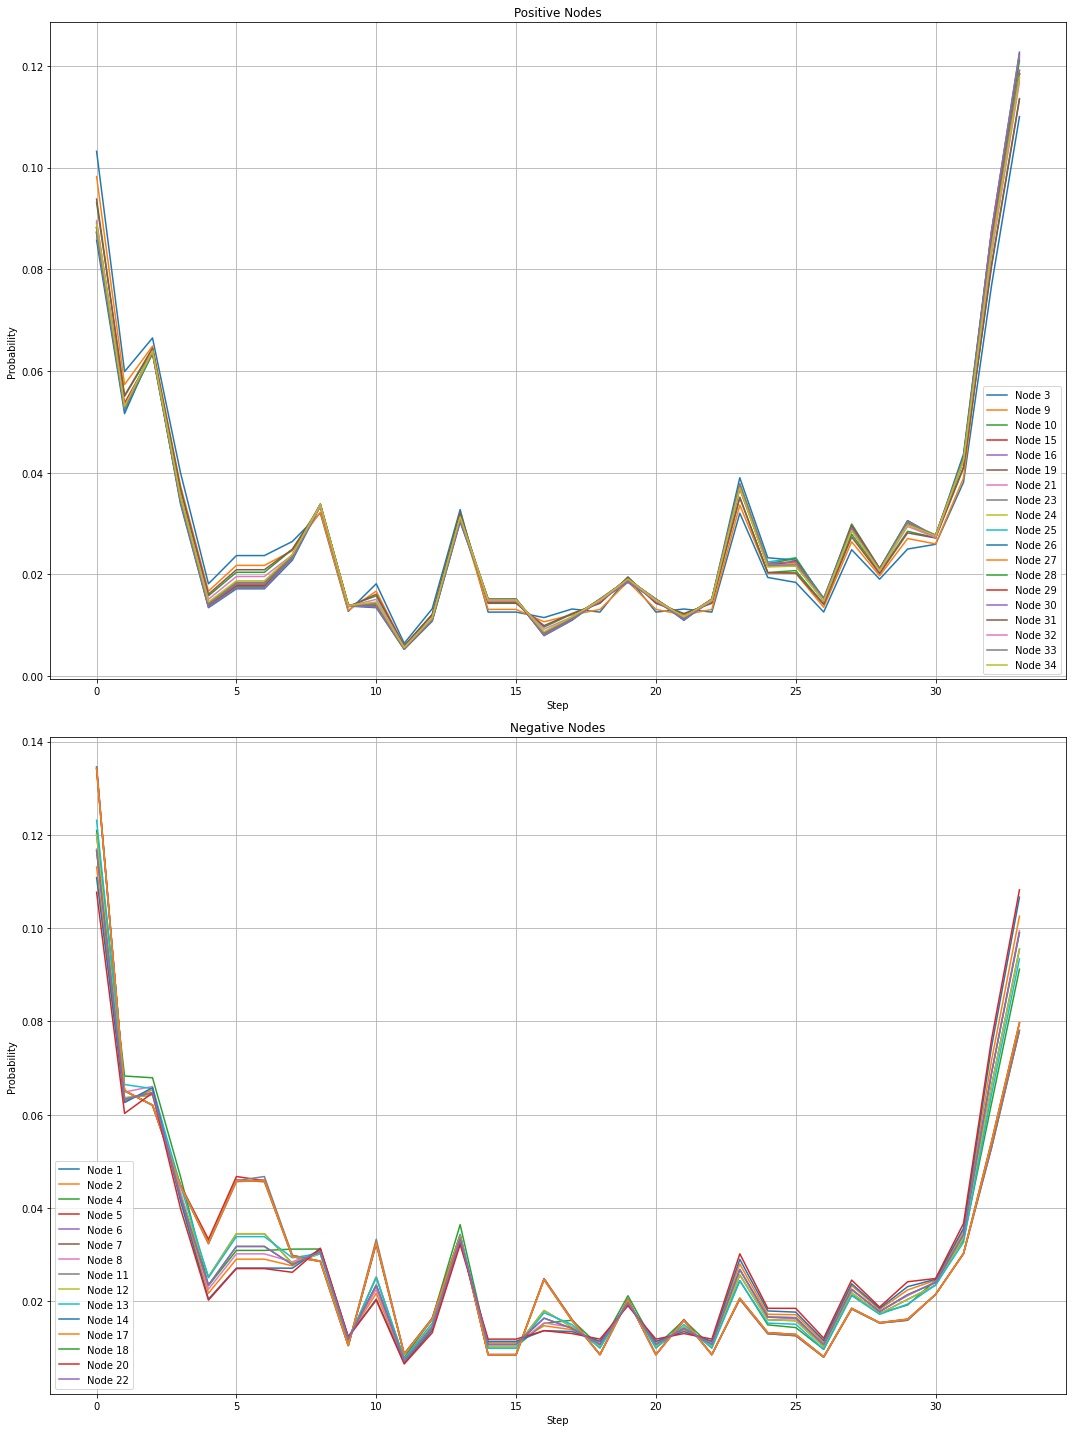

In [18]:
pos = [3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]

fig, (ax_pos, ax_neg) = plt.subplots(2, 1, figsize=(15, 20))

# Plot for positive nodes, adjusting for 0-based indexing
for node in pos:
    index = node - 1  # Adjusting node number to match 0-based indexing
    if index in steadystate_dict:
        probabilities = steadystate_dict[index]  # Access using adjusted index
        ax_pos.plot(probabilities, label=f'Node {node}')  # Label uses original node number

ax_pos.set_title('Positive Nodes')
ax_pos.set_xlabel('Step')
ax_pos.set_ylabel('Probability')
ax_pos.legend()
ax_pos.grid(True)

# Plot for negative nodes, adjusting for 0-based indexing
for node in neg:
    index = node - 1  # Adjusting node number to match 0-based indexing
    if index in steadystate_dict:
        probabilities = steadystate_dict[index]  # Access using adjusted index
        ax_neg.plot(probabilities, label=f'Node {node}')  # Label uses original node number

ax_neg.set_title('Negative Nodes')
ax_neg.set_xlabel('Step')
ax_neg.set_ylabel('Probability')
ax_neg.legend()
ax_neg.grid(True)

plt.tight_layout()
plt.show()

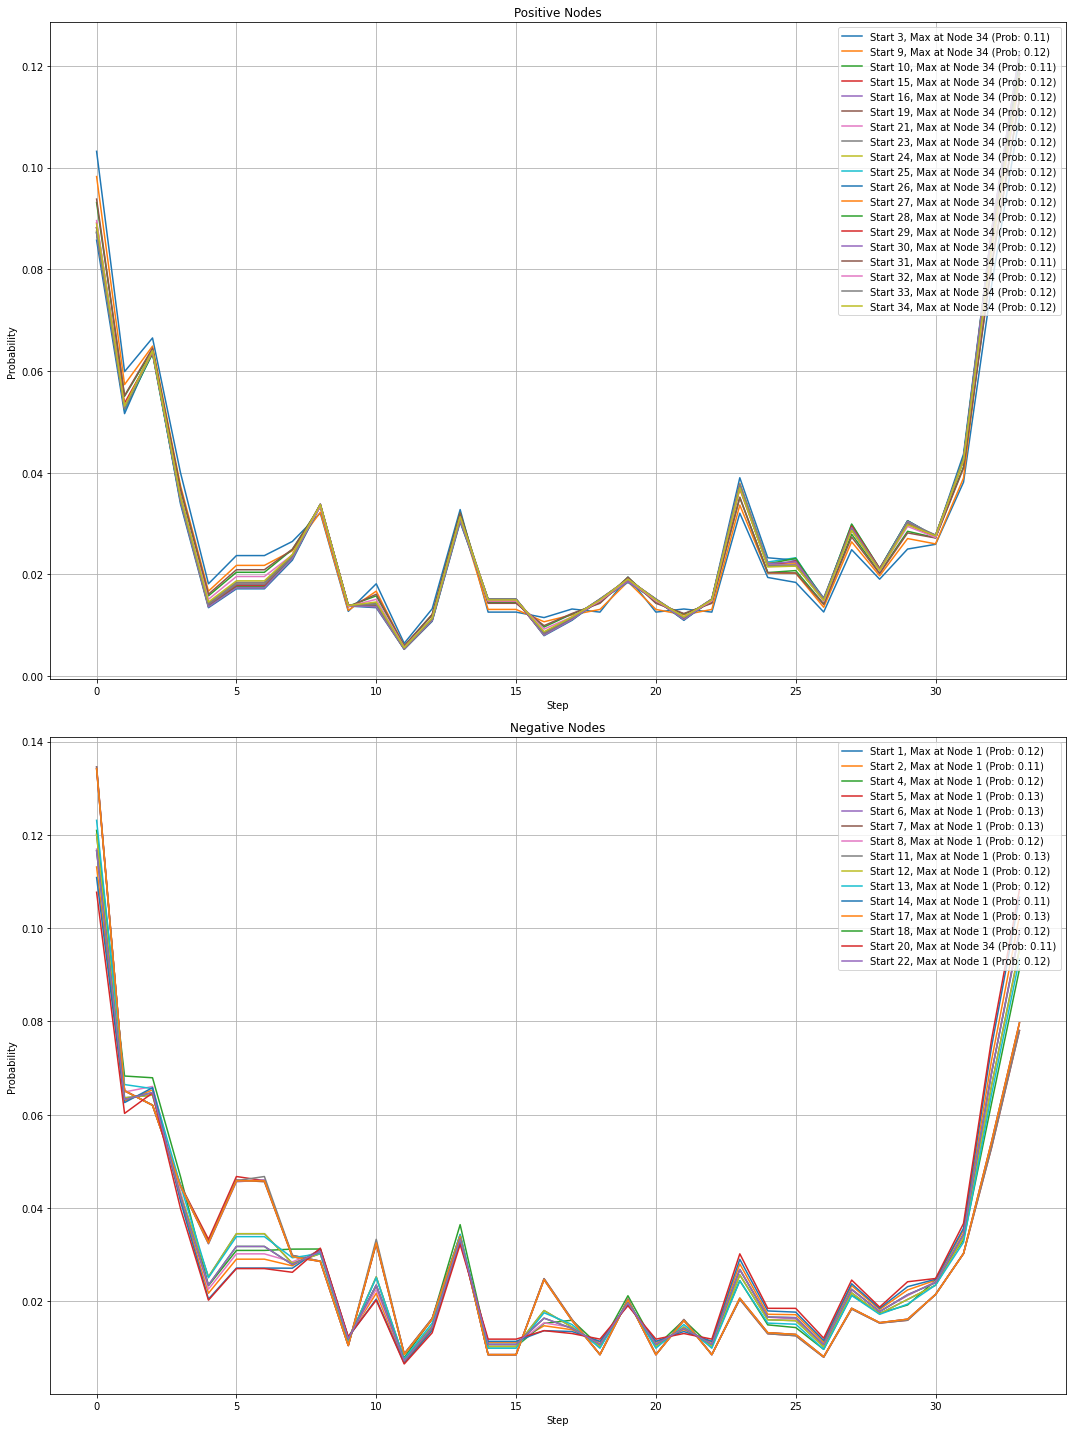

In [19]:
fig, (ax_pos, ax_neg) = plt.subplots(2, 1, figsize=(15, 20))

# Plot for positive nodes
for node in pos:
    index = node - 1  # Adjust for 0-based indexing
    if index in steadystate_dict:
        probabilities = steadystate_dict[index]
        max_prob_node = np.argmax(probabilities) + 1  # +1 to adjust for 1-based indexing
        max_prob = np.max(probabilities)
        label = f'Start {node}, Max at Node {max_prob_node} (Prob: {max_prob:.2f})'
        ax_pos.plot(probabilities, label=label)

ax_pos.set_title('Positive Nodes')
ax_pos.set_xlabel('Step')
ax_pos.set_ylabel('Probability')
ax_pos.legend(loc='upper right')
ax_pos.grid(True)

# Plot for negative nodes
for node in neg:
    index = node - 1  # Adjust for 0-based indexing
    if index in steadystate_dict:
        probabilities = steadystate_dict[index]
        max_prob_node = np.argmax(probabilities) + 1  # +1 to adjust for 1-based indexing
        max_prob = np.max(probabilities)
        label = f'Start {node}, Max at Node {max_prob_node} (Prob: {max_prob:.2f})'
        ax_neg.plot(probabilities, label=label)

ax_neg.set_title('Negative Nodes')
ax_neg.set_xlabel('Step')
ax_neg.set_ylabel('Probability')
ax_neg.legend(loc='upper right')
ax_neg.grid(True)

plt.tight_layout()
plt.show()

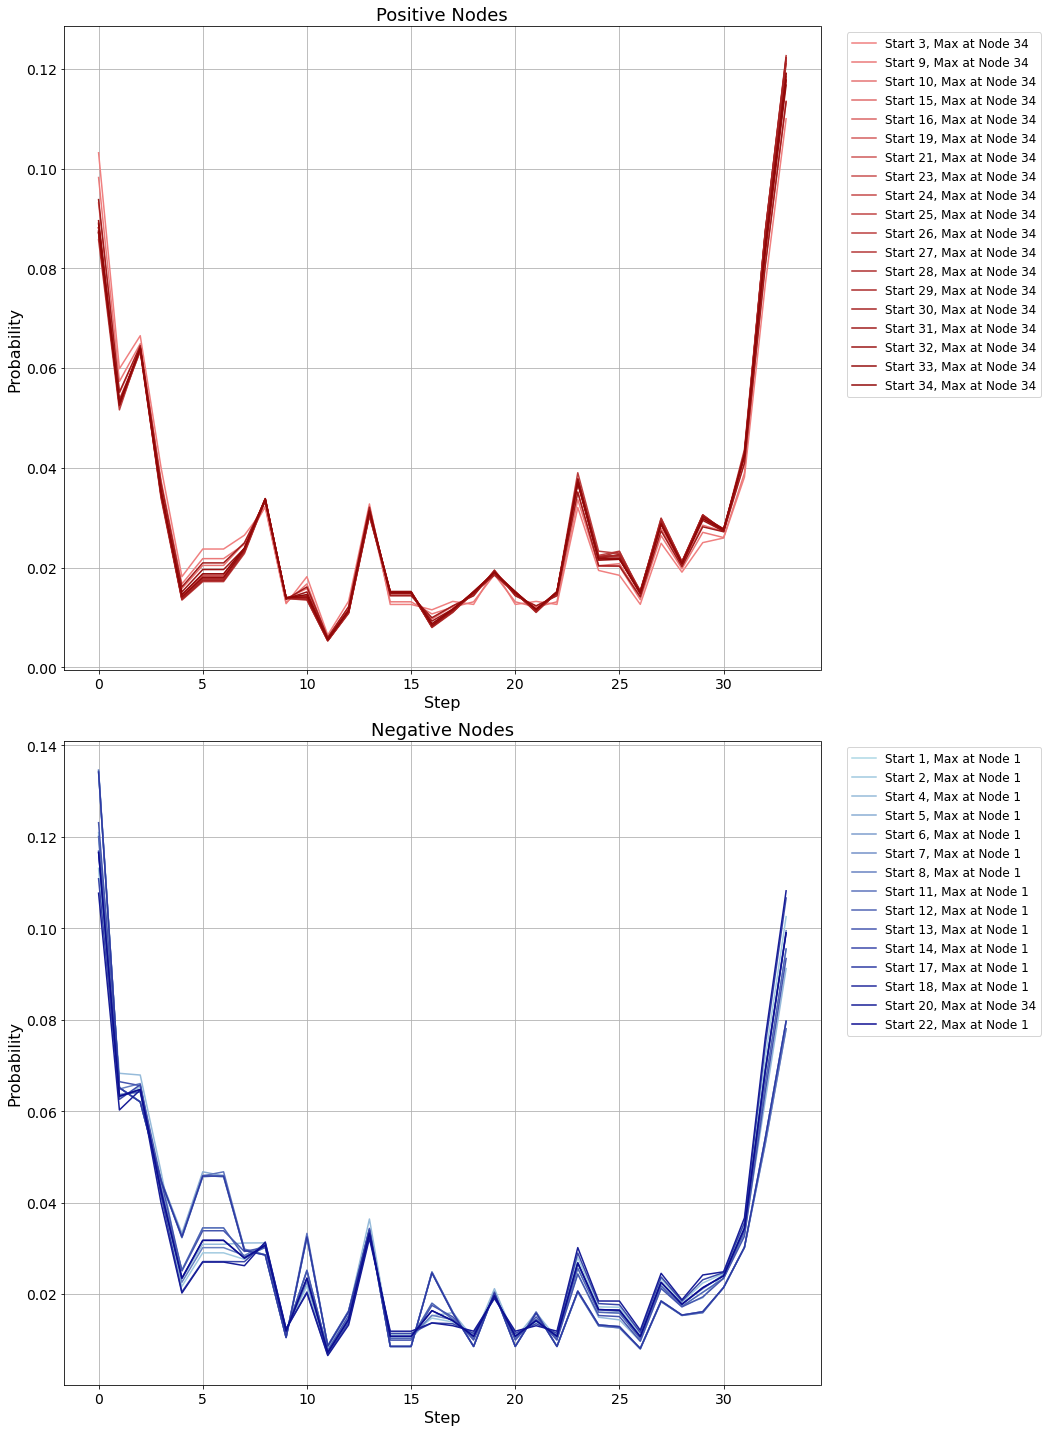

In [20]:
import matplotlib.colors as mcolors

fig, (ax_pos, ax_neg) = plt.subplots(2, 1, figsize=(15, 20))

# Define color gradients for positive (red) and negative (blue) lines
colors_pos = mcolors.LinearSegmentedColormap.from_list("", ["lightcoral", "darkred"])
colors_neg = mcolors.LinearSegmentedColormap.from_list("", ["lightblue", "darkblue"])

# Plot for positive nodes with gradient colors
for i, node in enumerate(pos):
    index = node - 1  # Adjust for 0-based indexing
    if index in steadystate_dict:
        probabilities = steadystate_dict[index]
        color = colors_pos(i / len(pos))  # Gradual color change
        max_prob_node = np.argmax(probabilities) + 1  # +1 to adjust for 1-based indexing
        label_pos = f'Start {node}, Max at Node {max_prob_node}'
        ax_pos.plot(probabilities, color=color, label=label_pos)

# Increase title, axis titles, and tick sizes for positive nodes subplot
ax_pos.set_title('Positive Nodes', fontsize=18)
ax_pos.set_xlabel('Step', fontsize=16)
ax_pos.set_ylabel('Probability', fontsize=16)
ax_pos.tick_params(axis='both', which='major', labelsize=14)
ax_pos.legend(bbox_to_anchor=(1.3, 1), fontsize=12)

ax_pos.grid(True)

# Plot for negative nodes with gradient colors
for i, node in enumerate(neg):
    index = node - 1  # Adjust for 0-based indexing
    if index in steadystate_dict:
        probabilities = steadystate_dict[index]
        color = colors_neg(i / len(neg))  # Gradual color change
        max_prob_node = np.argmax(probabilities) + 1  # +1 to adjust for 1-based indexing
        label_neg = f'Start {node}, Max at Node {max_prob_node}'
        ax_neg.plot(probabilities, color=color, label=label_neg)

# Increase title, axis titles, and tick sizes for negative nodes subplot
ax_neg.set_title('Negative Nodes', fontsize=18)
ax_neg.set_xlabel('Step', fontsize=16)
ax_neg.set_ylabel('Probability', fontsize=16)
ax_neg.tick_params(axis='both', which='major', labelsize=14)
ax_neg.legend(bbox_to_anchor=(1.3, 1), fontsize=12)
ax_neg.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# Function to print probabilities for a specific node
def print_probabilities_for_node(target_node, node_list, steadystate_dict):
    print(f"Probabilities for Node {target_node} from starting nodes in the given list:")
    for starting_node in node_list:
        if starting_node in steadystate_dict:
            # The target node's index in the probabilities list might need adjustment for 0-based indexing
            prob = steadystate_dict[starting_node][target_node - 1]  # Adjusting for 0-based indexing
            print(f"Starting Node {starting_node}: Probability {prob:.8f}")
            

# For Node 1
print("---- Node 1 ----")
print("Positive Fiedler Vector Nodes:")
print_probabilities_for_node(1, pos, steadystate_dict)
print("\nNegative Fiedler Vector Nodes:")
print_probabilities_for_node(1, neg, steadystate_dict)

# For Node 34
print("\n---- Node 34 ----")
print("Positive Fiedler Vector Nodes:")
print_probabilities_for_node(34, pos, steadystate_dict)
print("\nNegative Fiedler Vector Nodes:")
print_probabilities_for_node(34, neg, steadystate_dict)

---- Node 1 ----
Positive Fiedler Vector Nodes:
Probabilities for Node 1 from starting nodes in the given list:
Starting Node 3: Probability 0.12095521
Starting Node 9: Probability 0.09312941
Starting Node 10: Probability 0.13457767
Starting Node 15: Probability 0.08816409
Starting Node 16: Probability 0.13418317
Starting Node 19: Probability 0.10769354
Starting Node 21: Probability 0.11660819
Starting Node 23: Probability 0.08751617
Starting Node 24: Probability 0.08710568
Starting Node 25: Probability 0.08573836
Starting Node 26: Probability 0.08717343
Starting Node 27: Probability 0.08721897
Starting Node 28: Probability 0.08913373
Starting Node 29: Probability 0.08708424
Starting Node 30: Probability 0.09380510
Starting Node 31: Probability 0.08958087
Starting Node 32: Probability 0.08743981
Starting Node 33: Probability 0.08888837

Negative Fiedler Vector Nodes:
Probabilities for Node 1 from starting nodes in the given list:
Starting Node 1: Probability 0.11312058
Starting Node 2:

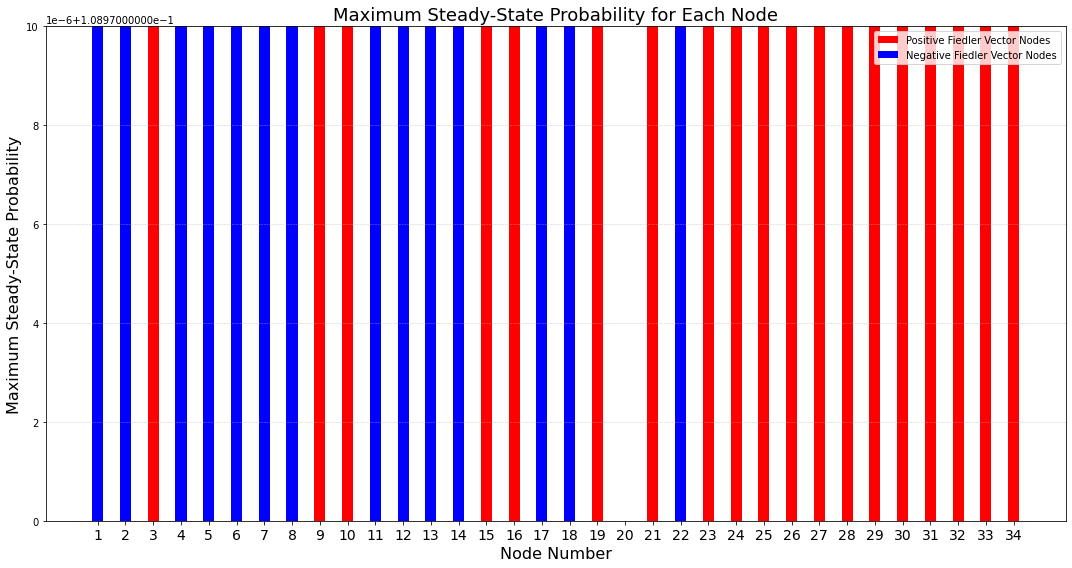

In [22]:

nodes = range(1, 35)
# Initialize arrays to store maximum probabilities for each node and the node number with the max probability
max_probs_pos = np.zeros_like(nodes, dtype=float)
max_probs_neg = np.zeros_like(nodes, dtype=float)
max_prob_node_pos = np.zeros_like(nodes, dtype=int)
max_prob_node_neg = np.zeros_like(nodes, dtype=int)

# Populate the arrays with maximum steady-state probabilities
for node in range(1, 35):
    if (node - 1) in steadystate_dict:
        probabilities = steadystate_dict[node - 1]
        max_prob = max(probabilities)  # Adjusting for 0-based indexing in steadystate_dict
        max_prob_node = np.argmax(probabilities) + 1  # Get the node with the max probability (+1 for 1-based indexing)
        if node in pos:
            max_probs_pos[node - 1] = max_prob  # Adjusting for 0-based indexing
            max_prob_node_pos[node - 1] = max_prob_node
        elif node in neg:
            max_probs_neg[node - 1] = max_prob  # Adjusting for 0-based indexing
            max_prob_node_neg[node - 1] = max_prob_node

# Plotting
plt.figure(figsize=(15, 8))
bar_width = 0.4  # Width of the bars

# Plot positive nodes in red
bars_pos = plt.bar(nodes, max_probs_pos, width=bar_width, color='red', label='Positive Fiedler Vector Nodes')

# Plot negative nodes in blue
bars_neg = plt.bar(nodes, max_probs_neg, width=bar_width, color='blue', label='Negative Fiedler Vector Nodes')

# Label the bars with the node that has the maximum probability
for bar, max_node in zip(bars_pos, max_prob_node_pos):
    if max_node > 0:  # Only label bars with a max node
        height = bar.get_height()
        plt.annotate('{}'.format(max_node),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

for bar, max_node in zip(bars_neg, max_prob_node_neg):
    if max_node > 0:  # Only label bars with a max node
        height = bar.get_height()
        plt.annotate('{}'.format(max_node),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.xlabel('Node Number',fontsize='16')
plt.ylabel('Maximum Steady-State Probability',fontsize='16')
plt.title('Maximum Steady-State Probability for Each Node',fontsize='18')
plt.xticks(nodes ,fontsize='14')  # Set x ticks to be every node
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.ylim(0.10897, 0.10898)  # Set the limits of the y-axis to zoom in on the differences
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


In [23]:
steadystate_dict

{0: array([0.12009579, 0.06363033, 0.06420302, 0.04282842, 0.02523331,
        0.03448771, 0.03448771, 0.02813312, 0.03021785, 0.01164118,
        0.02523331, 0.0074889 , 0.01472566, 0.03335574, 0.01032256,
        0.01032256, 0.01801354, 0.0144778 , 0.01032256, 0.01970043,
        0.01032256, 0.0144778 , 0.01032256, 0.02565924, 0.01603587,
        0.01584697, 0.01020685, 0.02180474, 0.01732458, 0.02039839,
        0.02345127, 0.03359283, 0.06615405, 0.09548076]),
 1: array([0.11312058, 0.06291531, 0.06531355, 0.04202414, 0.02172154,
        0.02902914, 0.02902914, 0.02760543, 0.0311334 , 0.01223252,
        0.02172154, 0.0069889 , 0.01411882, 0.03326709, 0.01123435,
        0.01123435, 0.01475442, 0.01390465, 0.01123435, 0.01956631,
        0.01123435, 0.01390465, 0.01123435, 0.02801109, 0.01721554,
        0.01712555, 0.01122118, 0.02335976, 0.01823084, 0.02243197,
        0.02452119, 0.03521113, 0.07158524, 0.10256361]),
 2: array([0.10319903, 0.05988754, 0.06650571, 0.04001538, 0.0

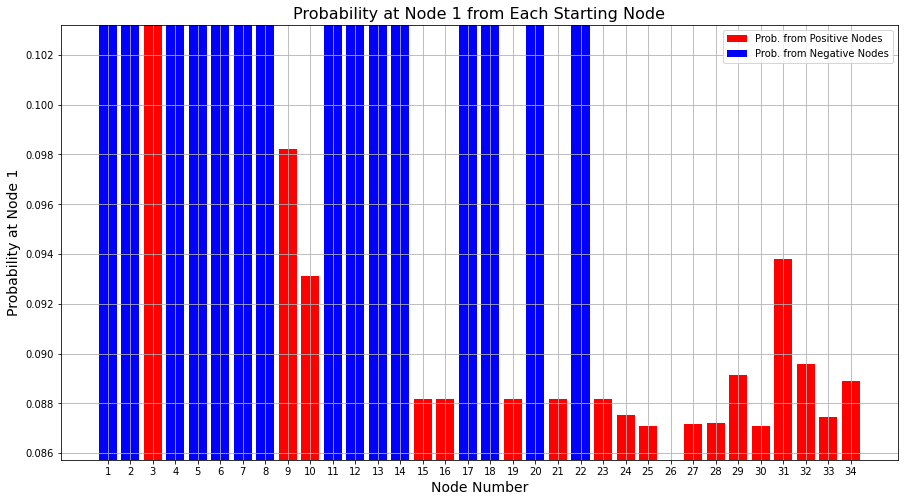

In [24]:

# Assuming 'steadystate_dict' contains the steady-state probabilities, with keys 0-33 (0-based indexing)
# and 'pos' and 'neg' lists are accurate and include node 34 if it has data.

# Ensure that node 34 is included in the pos or neg lists
assert 34 in pos or 34 in neg, "Node 34 must be in either 'pos' or 'neg' lists."

# Initialize arrays to hold the probability of reaching node 1 from each starting node
probabilities_at_node_1_from_pos = []
probabilities_at_node_1_from_neg = []

# Get probabilities for node 1 from all starting nodes
for node in range(1, 35):  # 1-34, inclusive
    # Check if node is a starting point in the steady state dict (0-based indexing)
    if (node - 1) in steadystate_dict:
        prob_at_node_1 = steadystate_dict[node - 1][0]  # Probability of being at node 1

        # Append probability to the respective list based on Fiedler vector
        if node in pos:
            probabilities_at_node_1_from_pos.append(prob_at_node_1)
        elif node in neg:
            probabilities_at_node_1_from_neg.append(prob_at_node_1)

# Check that node 34 is included in the probabilities lists
assert len(probabilities_at_node_1_from_pos) == len(pos), "Length mismatch for 'pos' list."
assert len(probabilities_at_node_1_from_neg) == len(neg), "Length mismatch for 'neg' list."

# Plotting the probabilities
plt.figure(figsize=(15, 8))

# Red bars for the probabilities from positive nodes
plt.bar(pos, probabilities_at_node_1_from_pos, color='red', label='Prob. from Positive Nodes')

# Blue bars for the probabilities from negative nodes
plt.bar(neg, probabilities_at_node_1_from_neg, color='blue', label='Prob. from Negative Nodes')

# Labels and title
plt.xlabel('Node Number',fontsize='14')
plt.ylabel('Probability at Node 1',fontsize='14')
plt.title('Probability at Node 1 from Each Starting Node',fontsize='16')
plt.legend()
plt.xticks(nodes)  # Set x ticks to be every node
total_fucking_probs=np.copy(probabilities_at_node_1_from_pos)
np.append(total_fucking_probs,probabilities_at_node_1_from_neg)
plt.ylim(min(total_fucking_probs)-0.000004,max(total_fucking_probs)+0.000006)
plt.grid(True)
plt.show()


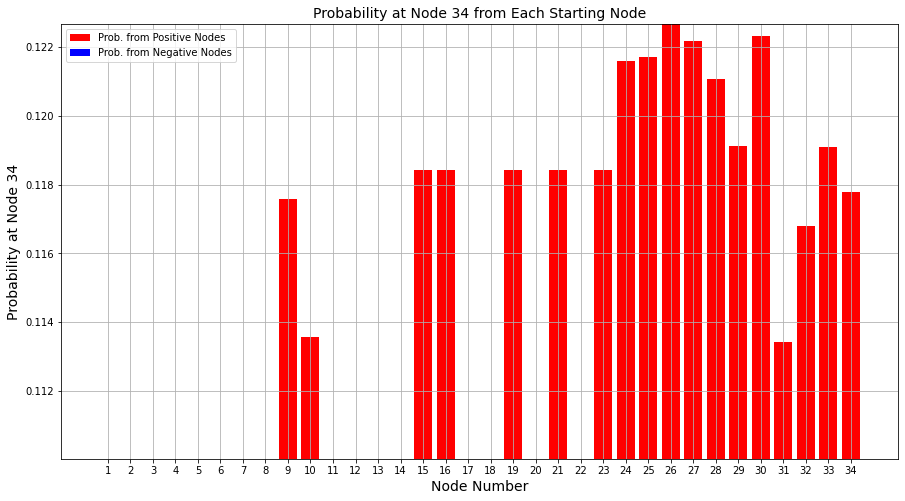

In [25]:

# Assuming 'steadystate_dict' contains the steady-state probabilities, with keys 0-33 (0-based indexing)
# and 'pos' and 'neg' lists are accurate and include node 34 if it has data.

# Ensure that node 34 is included in the pos or neg lists
assert 34 in pos or 34 in neg, "Node 34 must be in either 'pos' or 'neg' lists."

# Initialize arrays to hold the probability of reaching node 1 from each starting node
probabilities_at_node_1_from_pos = []
probabilities_at_node_1_from_neg = []

# Get probabilities for node 1 from all starting nodes
for node in range(1, 35):  # 1-34, inclusive
    # Check if node is a starting point in the steady state dict (0-based indexing)
    if (node - 1) in steadystate_dict:
        prob_at_node_1 = steadystate_dict[node - 1][33]  # Probability of being at node 1

        # Append probability to the respective list based on Fiedler vector
        if node in pos:
            probabilities_at_node_1_from_pos.append(prob_at_node_1)
        elif node in neg:
            probabilities_at_node_1_from_neg.append(prob_at_node_1)

# Check that node 34 is included in the probabilities lists
assert len(probabilities_at_node_1_from_pos) == len(pos), "Length mismatch for 'pos' list."
assert len(probabilities_at_node_1_from_neg) == len(neg), "Length mismatch for 'neg' list."

# Plotting the probabilities
plt.figure(figsize=(15, 8))

# Red bars for the probabilities from positive nodes
plt.bar(pos, probabilities_at_node_1_from_pos, color='red', label='Prob. from Positive Nodes')

# Blue bars for the probabilities from negative nodes
plt.bar(neg, probabilities_at_node_1_from_neg, color='blue', label='Prob. from Negative Nodes')

# Labels and title
plt.xlabel('Node Number',fontsize='14')
plt.ylabel('Probability at Node 34',fontsize='14')
plt.title('Probability at Node 34 from Each Starting Node',fontsize='14')
plt.legend()
plt.xticks(nodes)  # Set x ticks to be every node
total_fucking_probs=np.copy(probabilities_at_node_1_from_pos)
np.append(total_fucking_probs,probabilities_at_node_1_from_neg)
plt.ylim(min(total_fucking_probs)-0.000006,max(total_fucking_probs)+0.000001)
plt.grid(True)
plt.show()
